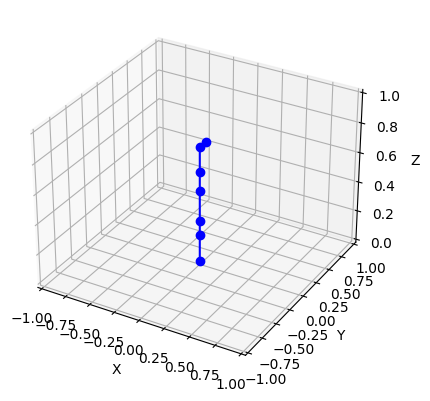

<Figure size 640x480 with 0 Axes>

In [17]:
import numpy
import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D
from sympy import Matrix, Symbol, symbols, solveset
from sympy import S, erf, log, sqrt, pi, sin, cos, tan
from sympy import init_printing

def T(x, y, z):
   T_xyz = Matrix([[1,         0,          0,          x],
                   [0,         1,          0,          y],
                   [0,         0,          1,          z],
                   [0,         0,          0,          1]])
   return T_xyz

def Rx(roll):
   R_x = Matrix([[1,         0,          0, 0],
                 [0, cos(roll), -sin(roll), 0],
                 [0, sin(roll),  cos(roll), 0],
                 [0,         0,          0, 1]])
   return R_x

def Ry(pitch):
   R_y = Matrix([[ cos(pitch), 0, sin(pitch), 0],
                 [          0, 1,          0, 0],
                 [-sin(pitch), 0, cos(pitch), 0],
                 [          0, 0,          0, 1]])
   return R_y

def Rz(yaw):
   R_z = Matrix([[cos(yaw),-sin(yaw), 0, 0],
                 [sin(yaw), cos(yaw), 0, 0],
                 [       0,        0, 1, 0],
                 [       0,        0, 0, 1]])
   return R_z

def R(roll, pitch, yaw):
   R_x = Matrix([[1,         0,          0],
                 [0, cos(roll), -sin(roll)],
                 [0, sin(roll),  cos(roll)]])

   R_y = Matrix([[ cos(pitch), 0, sin(pitch)],
                 [          0, 1,          0],
                 [-sin(pitch), 0, cos(pitch)]])

   R_z = Matrix([[cos(yaw),-sin(yaw), 0],
                 [sin(yaw), cos(yaw), 0],
                 [       0,        0, 1]])
   return R_z*R_y*R_x


# p0 = Matrix([0,0,0,1])
# p1 = Matrix([0,0,0.187,1])
# p2 = Matrix([0,0,0.187+0.096,1])
# p3 = Matrix([0.205*cos(pi/4),0,0.187+0.096+0.205*sin(pi/4),1])
# p4 = Matrix([0.205*cos(pi/4)+0.124,0,0.187+0.096+0.205*sin(pi/4),1])
# p5 = Matrix([0.205*cos(pi/4)+0.124+0.167,0,0.187+0.096+0.205*sin(pi/4),1])
# p6 = Matrix([0.205*cos(pi/4)+0.124+0.167,0,0.187+0.096+0.205*sin(pi/4)-0.104,1])

# Define transforms to each joint
T1 = Ry(-pi/2) * T(0.187, 0, 0) * Rx(0)
T2 = T1 * T(0.096, 0, 0) * Rz(0)
T3 = T2 * T(0.205, 0, 0) * Rz(0)
T4 = T3 * T(0.124, 0, 0) * Rx(0)
T5 = T4 * T(0.167, 0, 0) * Rz(0)
T6 = T5 * T(0.104, 0, 0) * Rx(0)

# Find joint positions in space
p0 = Matrix([0,0,0,1])
p1 = T1 * p0
p2 = T2 * p0
p3 = T3 * p0
p4 = T4 * p0
p5 = T5 * p0
p6 = T6 * p0

soa = numpy.array([p0,p1,p2,p3,p4,p5,p6])
X, Y, Z, W = zip(*soa)
X = numpy.array(X)
Y = numpy.array(Y)
Z = numpy.array(Z)
W = numpy.array(W)
X = numpy.ndarray.flatten(X)
Y = numpy.ndarray.flatten(Y)
Z = numpy.ndarray.flatten(Z)
W = numpy.ndarray.flatten(W)
fig = matplotlib.pyplot.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])
ax.plot3D(X,Y,Z, 'blue', marker="o")
matplotlib.pyplot.show()
ax.plot3D(X,Y,Z, 'blue', marker="o")
matplotlib.pyplot.draw()
matplotlib.pyplot.show()
matplotlib.pyplot.pause(1)